# Project 2 : Toxic Tweets - NLP Problem

### Step 1: Load the Dataset

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv("FinalBalancedDataset.csv")

In [4]:
df.head(5)

,Unnamed: 0,Toxicity,tweet
0,0,0,@user when a father is dysfunctional and is s...
1,1,0,@user @user thanks for #lyft credit i can't us...
2,2,0,bihday your majesty
3,3,0,#model i love u take with u all the time in ...
4,4,0,factsguide: society now #motivation


In [5]:
df.tail(5)

,Unnamed: 0,Toxicity,tweet
56740,56740,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
56741,56741,1,"you've gone and broke the wrong heart baby, an..."
56742,56742,1,young buck wanna eat!!.. dat nigguh like I ain...
56743,56743,1,youu got wild bitches tellin you lies
56744,56744,0,~~Ruffled | Ntac Eileen Dahlia - Beautiful col...


In [6]:
df.shape

(56745, 3)

### Step 2: Text Conversion, Model Training and Prediction

## Bag of Words

### Decision Tree Classifier with BoW

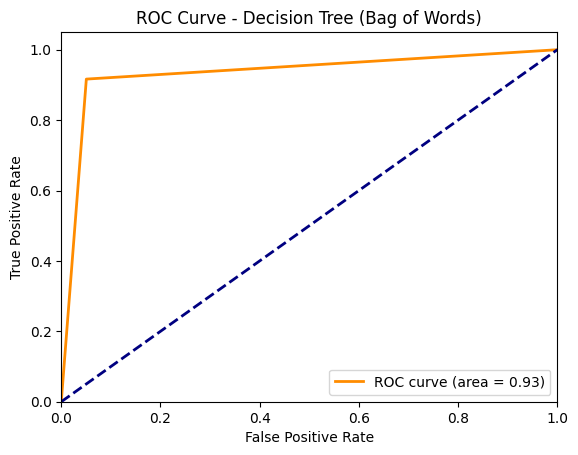

,Model,Vectorization,Precision,Recall,F1-Score,ROC-AUC,Confusion Matrix
0,Decision Tree,Bag of Words,0.931832,0.916547,0.924127,0.933011,"[[6145, 327], [407, 4470]]"


In [12]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns 'tweet' and 'Toxicity', renamed to 'label'
df.rename(columns={"Toxicity": "label"}, inplace=True)

# Convert text to Bag of Words
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(df['tweet'])
y = df['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)

# Initialize model
model = DecisionTreeClassifier()

# Train and evaluate model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate ROC curve and AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree (Bag of Words)')
plt.legend(loc="lower right")
plt.show()

# Store results in DataFrame
results = [{
    "Model": "Decision Tree",
    "Vectorization": "Bag of Words",
    "Precision": report['1']['precision'],
    "Recall": report['1']['recall'],
    "F1-Score": report['1']['f1-score'],
    "ROC-AUC": roc_auc,
    "Confusion Matrix": conf_matrix.tolist()
}]
results_df = pd.DataFrame(results)

# Display results
results_df

## Random Forest Classifier with BoW

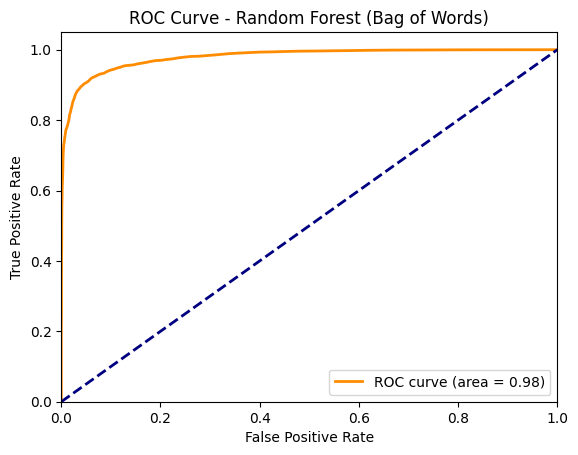

,Model,Vectorization,Precision,Recall,F1-Score,ROC-AUC,Confusion Matrix
0,Random Forest,Bag of Words,0.928901,0.90814,0.918403,0.9791,"[[6133, 339], [448, 4429]]"


In [13]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

df.rename(columns={"Toxicity": "label"}, inplace=True)

vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(df['tweet'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)

model = RandomForestClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (Bag of Words)')
plt.legend(loc="lower right")
plt.show()

results = [{
    "Model": "Random Forest",
    "Vectorization": "Bag of Words",
    "Precision": report['1']['precision'],
    "Recall": report['1']['recall'],
    "F1-Score": report['1']['f1-score'],
    "ROC-AUC": roc_auc,
    "Confusion Matrix": conf_matrix.tolist()
}]
results_df = pd.DataFrame(results)
results_df


## Naive Bayes Classifier with BoW

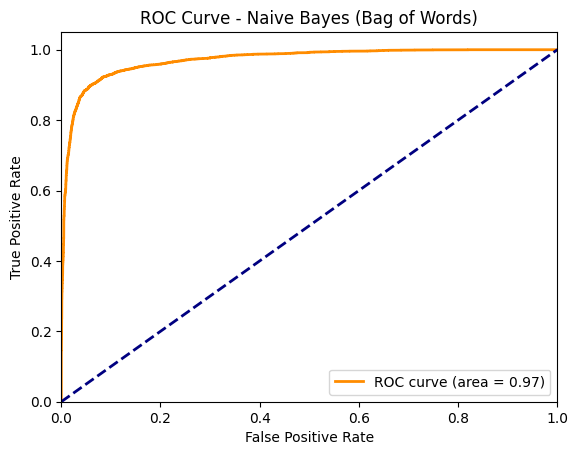

,Model,Vectorization,Precision,Recall,F1-Score,ROC-AUC,Confusion Matrix
0,Naive Bayes,Bag of Words,0.88225,0.926389,0.903781,0.970847,"[[5869, 603], [359, 4518]]"


In [14]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

df.rename(columns={"Toxicity": "label"}, inplace=True)

vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(df['tweet'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)

model = MultinomialNB()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes (Bag of Words)')
plt.legend(loc="lower right")
plt.show()

results = [{
    "Model": "Naive Bayes",
    "Vectorization": "Bag of Words",
    "Precision": report['1']['precision'],
    "Recall": report['1']['recall'],
    "F1-Score": report['1']['f1-score'],
    "ROC-AUC": roc_auc,
    "Confusion Matrix": conf_matrix.tolist()
}]
results_df = pd.DataFrame(results)

results_df


## K-Nearest Neighbors Classifier with BoW

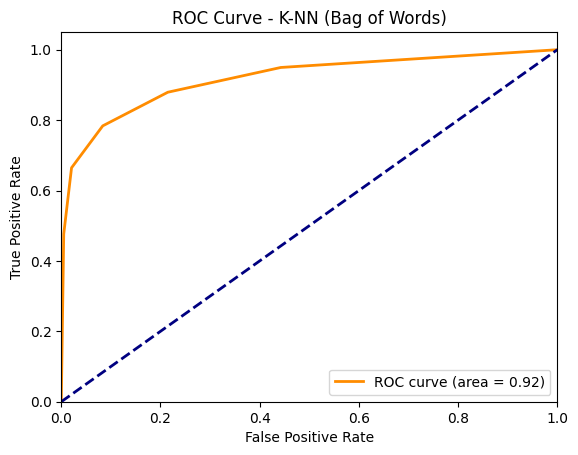

,Model,Vectorization,Precision,Recall,F1-Score,ROC-AUC,Confusion Matrix
0,K-NN Classifier,Bag of Words,0.876003,0.783678,0.827273,0.916447,"[[5931, 541], [1055, 3822]]"


In [15]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

df.rename(columns={"Toxicity": "label"}, inplace=True)

vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(df['tweet'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)

model = KNeighborsClassifier()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - K-NN (Bag of Words)')
plt.legend(loc="lower right")
plt.show()

results = [{
    "Model": "K-NN Classifier",
    "Vectorization": "Bag of Words",
    "Precision": report['1']['precision'],
    "Recall": report['1']['recall'],
    "F1-Score": report['1']['f1-score'],
    "ROC-AUC": roc_auc,
    "Confusion Matrix": conf_matrix.tolist()
}]
results_df = pd.DataFrame(results)
results_df


## Support Vector Machine (SVM) Classifier with BoW

In [16]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

df.rename(columns={"Toxicity": "label"}, inplace=True)

vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(df['tweet'])
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X_bow, y, test_size=0.2, random_state=42)

model = SVC(probability=True)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM (Bag of Words)')
plt.legend(loc="lower right")
plt.show()

results = [{
    "Model": "SVM",
    "Vectorization": "Bag of Words",
    "Precision": report['1']['precision'],
    "Recall": report['1']['recall'],
    "F1-Score": report['1']['f1-score'],
    "ROC-AUC": roc_auc,
    "Confusion Matrix": conf_matrix.tolist()
}]
results_df = pd.DataFrame(results)

results_df


# TF-IDF

## SVM Classifier with TF-IDF

In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns 'tweet' and 'Toxicity', renamed to 'label'
df.rename(columns={"Toxicity": "label"}, inplace=True)

# Convert text to TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(df['tweet'])
y = df['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.01, random_state=42)

# Initialize model with linear kernel
model = SVC(kernel='linear', probability=True)

# Train and evaluate model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate ROC curve and AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - SVM (TF-IDF)')
plt.legend(loc="lower right")
plt.show()

# Store results in DataFrame
results = [{
    "Model": "SVM",
    "Vectorization": "TF-IDF",
    "Precision": report['1']['precision'],
    "Recall": report['1']['recall'],
    "F1-Score": report['1']['f1-score'],
    "ROC-AUC": roc_auc,
    "Confusion Matrix": conf_matrix.tolist()
}]
results_df = pd.DataFrame(results)

# Display results
results_df


## Decision Tree Classifier with TF-IDF

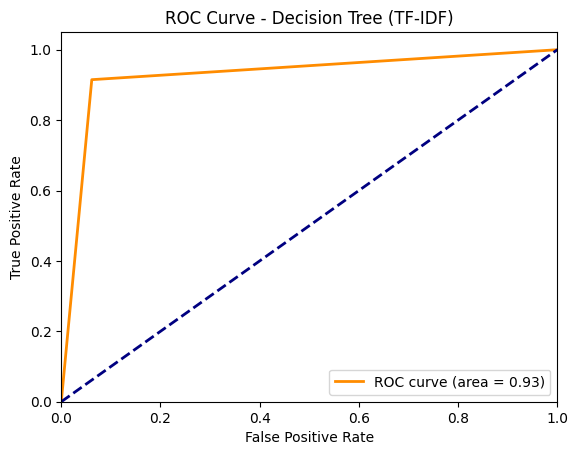

,Model,Vectorization,Precision,Recall,F1-Score,ROC-AUC,Confusion Matrix
0,Decision Tree,TF-IDF,0.918107,0.914907,0.916504,0.926706,"[[6074, 398], [415, 4462]]"


In [5]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns 'tweet' and 'Toxicity', renamed to 'label'
df.rename(columns={"Toxicity": "label"}, inplace=True)

# Convert text to TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(df['tweet'])
y = df['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Initialize model
model = DecisionTreeClassifier()

# Train and evaluate model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate ROC curve and AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree (TF-IDF)')
plt.legend(loc="lower right")
plt.show()

# Store results in DataFrame
results = [{
    "Model": "Decision Tree",
    "Vectorization": "TF-IDF",
    "Precision": report['1']['precision'],
    "Recall": report['1']['recall'],
    "F1-Score": report['1']['f1-score'],
    "ROC-AUC": roc_auc,
    "Confusion Matrix": conf_matrix.tolist()
}]
results_df = pd.DataFrame(results)

# Display results
results_df


## Random Forest Classifier with TF-IDF

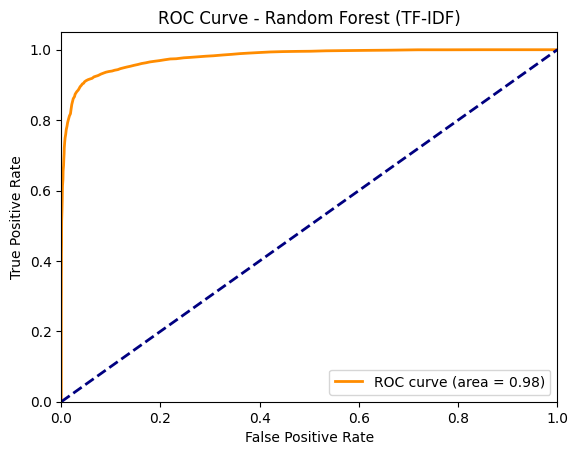

,Model,Vectorization,Precision,Recall,F1-Score,ROC-AUC,Confusion Matrix
0,Random Forest,TF-IDF,0.936008,0.908755,0.922181,0.978535,"[[6169, 303], [445, 4432]]"


In [6]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns 'tweet' and 'Toxicity', renamed to 'label'
df.rename(columns={"Toxicity": "label"}, inplace=True)

# Convert text to TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(df['tweet'])
y = df['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Initialize model
model = RandomForestClassifier()

# Train and evaluate model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate ROC curve and AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (TF-IDF)')
plt.legend(loc="lower right")
plt.show()

# Store results in DataFrame
results = [{
    "Model": "Random Forest",
    "Vectorization": "TF-IDF",
    "Precision": report['1']['precision'],
    "Recall": report['1']['recall'],
    "F1-Score": report['1']['f1-score'],
    "ROC-AUC": roc_auc,
    "Confusion Matrix": conf_matrix.tolist()
}]
results_df = pd.DataFrame(results)

# Display results
results_df


## Naive Bayes Classifier with TF-IDF

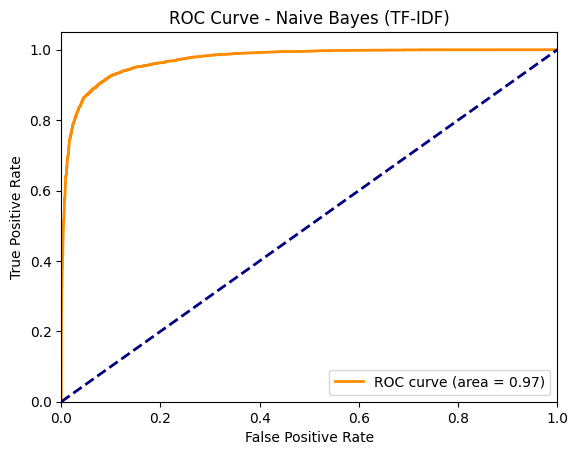

,Model,Vectorization,Precision,Recall,F1-Score,ROC-AUC,Confusion Matrix
0,Naive Bayes,TF-IDF,0.904792,0.894402,0.899567,0.971978,"[[6013, 459], [515, 4362]]"


In [7]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns 'tweet' and 'Toxicity', renamed to 'label'
df.rename(columns={"Toxicity": "label"}, inplace=True)

# Convert text to TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(df['tweet'])
y = df['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Initialize model
model = MultinomialNB()

# Train and evaluate model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate ROC curve and AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes (TF-IDF)')
plt.legend(loc="lower right")
plt.show()

# Store results in DataFrame
results = [{
    "Model": "Naive Bayes",
    "Vectorization": "TF-IDF",
    "Precision": report['1']['precision'],
    "Recall": report['1']['recall'],
    "F1-Score": report['1']['f1-score'],
    "ROC-AUC": roc_auc,
    "Confusion Matrix": conf_matrix.tolist()
}]
results_df = pd.DataFrame(results)

# Display results
results_df


## K-NN Classifier with TF-IDF

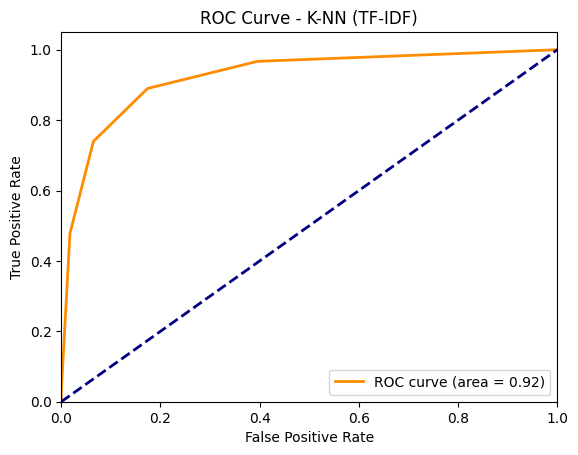

,Model,Vectorization,Precision,Recall,F1-Score,ROC-AUC,Confusion Matrix
0,K-NN,TF-IDF,0.89573,0.739799,0.810331,0.922375,"[[6052, 420], [1269, 3608]]"


In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with columns 'tweet' and 'Toxicity', renamed to 'label'
df.rename(columns={"Toxicity": "label"}, inplace=True)

# Convert text to TF-IDF
vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(df['tweet'])
y = df['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Initialize model
model = KNeighborsClassifier()

# Train and evaluate model
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate ROC curve and AUC
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - K-NN (TF-IDF)')
plt.legend(loc="lower right")
plt.show()

# Store results in DataFrame
results = [{
    "Model": "K-NN",
    "Vectorization": "TF-IDF",
    "Precision": report['1']['precision'],
    "Recall": report['1']['recall'],
    "F1-Score": report['1']['f1-score'],
    "ROC-AUC": roc_auc,
    "Confusion Matrix": conf_matrix.tolist()
}]
results_df = pd.DataFrame(results)

# Display results
results_df
